In [1]:
import numpy as np
import scipy.stats as stats
from tqdm import tqdm as tqdm
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1.  –ß—Ç–æ –º—ã –ø—Ä–æ—à–ª–∏ –Ω–∞ –ø–µ—Ä–≤–æ–º –∑–∞–Ω—è—Ç–∏–∏? 
## 1.1 t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö

$$H_0:\bar X_t -  \bar X_c = 0$$
$$H_1:\bar X_t -  \bar X_c\neq 0$$

1. –ü–æ –¶–ü–¢ 

$\bar X_t \xrightarrow{d} \mathcal{N}(\mu_t, \dfrac{\sigma_t^2}{n})$ –∏ $\bar X_c \xrightarrow{d} \mathcal{N}(\mu_c, \dfrac{\sigma_c^2}{m})$

2. –ü–æ —Å–≤–æ–π—Å—Ç–≤—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

$\bar X_t - \bar X_—Å \xrightarrow{d} \mathcal{N}(\mu_t - \mu_—Å, \dfrac{\sigma_t^2}{n} + \dfrac{\sigma_—Å^2}{m})$ 

3. –ü—Ä–∏ –≤–µ—Ä–Ω–æ—Å—Ç–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã $\mu_t - \mu_—Å = 0$, –ø–æ—ç—Ç–æ–º—É 

$\dfrac{\bar X_t - \bar X_—Å}{\sqrt{\dfrac{\sigma_t^2}{n} + \dfrac{\sigma_—Å^2}{m}}} \xrightarrow{d} \mathcal{N}(0, 1)$

4. 
$\dfrac{\bar X_t - \bar X_—Å}{\sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m}}}  \xrightarrow{d} \mathcal{N}(0, 1)$, 

–≥–¥–µ 

$\hat\sigma_t^2 = S_{X_t}^2 = \dfrac{1}{n-1} \sum\limits_{i=1}^{n} \left(X_t^i - \bar X_t\right)^2$

$\hat\sigma_c^2 = S_{X_c}^2 = \dfrac{1}{m-1} \sum\limits_{i=1}^{m} \left(X_c^i - \bar X_c\right)^2$

---

–î–ª—è —Å–ª—É—á–∞—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—É—á–∏–º $t(n+m-2)$.



## 1.2 z-test, t-test

–û—Ç–ª–∏—á–∏–µ –≤ —Ç–æ–º –∫–∞–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 


- –¥–ª—è t-test –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è $ùë°(ùëõ+ùëö‚àí2)$, –∫–æ–≥–¥–∞:  
  - –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞ –¥–∏—Å–ø–µ—Ä—Å–∏—è –ø–æ–ø—É–ª—è—Ü–∏–∏
  - –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ 

- –¥–ª—è z-test –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è $\mathcal{N}(0, 1)$, –∫–æ–≥–¥–∞:  
  - –∏–∑–≤–µ—Å—Ç–Ω–∞ –∏–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –¥–∏—Å–ø–µ—Ä—Å–∏—è –ø–æ–ø—É–ª—è—Ü–∏–∏;
  - –≤—ã–±–æ—Ä–∫–∞ –±–æ–ª—å—à–∞—è (30+).

---

- –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ t-test –ø—Ä–∏–º–µ–Ω—è—é—Ç –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ:
  - –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ–±—â–µ–π –ø–æ–ø—É–ª—è—Ü–∏–∏ –Ω–∏–∫–æ–≥–¥–∞ –ù–ï –∏–∑–≤–µ—Å—Ç–Ω–∞;
  - t-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö n –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É (–Ω–∞—á–∏–Ω–∞—è —Å 30 —Ä–∞–∑–Ω–∏—Ü–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞), —Ç–∞–∫ —á—Ç–æ t-test —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–∞–∫ z-test –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

## 2.1 –û—à–∏–±–∫–∏ I –∏ II —Ä–æ–¥–∞. 

- –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ‚Äî $H_0$
- –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ‚Äî $H_1$

---

### –û—à–∏–±–∫–∞ I —Ä–æ–¥–∞ ($\alpha$)
–≠—Ç–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã $H_0$, –∫–æ–≥–¥–∞ –æ–Ω–∞ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –≤–µ—Ä–Ω–∞. –ú—ã —Å –ø–æ–º–æ—â—å—é —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha$ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ–º —ç—Ç—É –æ—à–∏–±–∫—É. 

**–¢–æ –µ—Å—Ç—å:**  
–ú—ã —Ä–µ—à–∏–ª–∏, —á—Ç–æ —ç—Ñ—Ñ–µ–∫—Ç –µ—Å—Ç—å (–∏–ª–∏ —Ä–∞–∑–ª–∏—á–∏–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç), —Ö–æ—Ç—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –µ–≥–æ –Ω–µ—Ç.

- –û–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è:  
  $\alpha = P(\text{–æ—Ç–∫–ª–æ–Ω–∏—Ç—å } H_0 \mid H_0 \text{ –≤–µ—Ä–Ω–∞})$
- –ù–∞–∑—ã–≤–∞—é—Ç –µ—â–µ "—É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏" —Ç–µ—Å—Ç–∞.

---

### –û—à–∏–±–∫–∞ II —Ä–æ–¥–∞ ($\beta$)
–≠—Ç–æ –Ω–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã $H_0$, –∫–æ–≥–¥–∞ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –≤–µ—Ä–Ω–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ $H_1$.

**–¢–æ –µ—Å—Ç—å:**   
–ú—ã –Ω–µ –Ω–∞—à–ª–∏ —ç—Ñ—Ñ–µ–∫—Ç (–∏–ª–∏ —Ä–∞–∑–ª–∏—á–∏—è), —Ö–æ—Ç—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –æ–Ω–∏ —Å—É—â–µ—Å—Ç–≤—É—é—Ç.

üî• –í–æ–ø—Ä–æ—Å –Ω–∞ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–∏. –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –º–µ–∂–¥—É —Å–æ–±–æ–π –æ—à–∏–±–∫–∏ I –∏ II —Ä–æ–¥–∞? 

<img src="pictures/errors.png" width="600">


- $\alpha \downarrow \, \Rightarrow \ \beta \uparrow$
- $\alpha \uparrow \, \Rightarrow \ \beta \downarrow$
- $\text{—ç—Ñ—Ñ–µ–∫—Ç} \uparrow \,  \Rightarrow \ \beta \downarrow$

<img src="pictures/errors2.png" width="800">

<img src="pictures/beta_decreasing.gif" width="800">

–†–∞–∑–Ω—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã: 

$H_0$: –ë–æ–ª–µ–∑–Ω–∏ –Ω–µ—Ç

$H_1$: –ë–æ–ª–µ–∑–Ω—å –µ—Å—Ç—å

**–†–ò–°–ö:** –Ω–µ –Ω–∞–π—Ç–∏ –±–æ–ª–µ–∑–Ω—å, –µ—Å–ª–∏ –æ–Ω–∞ –µ—Å—Ç—å, —Ç–æ –µ—Å—Ç—å —Å–æ–≤–µ—Ä—à–∏—Ç—å –æ—à–∏–±–∫—É II —Ä–æ–¥–∞. 

–†–∞–∑–Ω—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã:

$H_0$: –õ–µ–∫–∞—Ä—Å—Ç–≤–æ –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç 

$H_1$: –õ–µ–∫–∞—Ä—Å—Ç–≤–æ –ø–æ–º–æ–≥–∞–µ—Ç 

**–†–ò–°–ö:** –ª–µ—á–∏—Ç—å —Å –ø–æ–º–æ—â—å—é –ø–ª–∞—Ü–µ–±–æ, —Ç–æ –µ—Å—Ç—å –æ—à–∏–±–∫–∞ I —Ä–æ–¥–∞ –æ—á–µ–Ω—å –∫—Ä–∏—Ç–∏—á–Ω–∞.

–ï—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç –≤ IT: $\alpha = 0.05, \beta = 0.2$.

> **–ú–æ—â–Ω–æ—Å—Ç—å** —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ç–µ—Å—Ç–∞ $1- \beta = 0.8$

## 2.2 MDE


**MDE (Minimal Detectable Effect)** ‚Äî —ç—Ç–æ _–º–∏–Ω–∏–º–∞–ª—å–Ω–æ –æ–±–Ω–∞—Ä—É–∂–∏–≤–∞–µ–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç_ (–∏–ª–∏ _–º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–ª–∏—á–∏–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç_) –≤ A/B —Ç–µ—Å—Ç–∞—Ö.


**MDE** ‚Äî —ç—Ç–æ –Ω–∞–∏–º–µ–Ω—å—à–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–æ–π, –∫–æ—Ç–æ—Ä—É—é –≤–∞—à —Ç–µ—Å—Ç ‚Äú–≤–∏–¥–∏—Ç‚Äù, —Ç–æ –µ—Å—Ç—å –º–æ–∂–µ—Ç —Å –∑–∞–¥–∞–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å –∫–∞–∫ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—É—é, –ø—Ä–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö:  
- —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ ($n$),  
- —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ ($\alpha$, –Ω–∞–ø—Ä–∏–º–µ—Ä 0.05),  
- —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –º–æ—â–Ω–æ—Å—Ç–∏ —Ç–µ—Å—Ç–∞ (power = $1-\beta$, –æ–±—ã—á–Ω–æ 0.8 –∏–ª–∏ 80%).


### –ü–æ—á–µ–º—É –≤–∞–∂–µ–Ω MDE?

- –ü–æ–º–æ–≥–∞–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å –Ω—É–∂–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏: —á–µ–º –º–µ–Ω—å—à–µ –∂–µ–ª–∞–µ–º—ã–π MDE, —Ç–µ–º –±–æ–ª—å—à–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω—É–∂–Ω–æ.
- –ü–æ–º–æ–≥–∞–µ—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—Ä–∞—Ç–Ω—ã–º —Ö–æ–¥–æ–º: –µ—Å–ª–∏ MDE = 10%, –≤—ã –Ω–µ —Å–º–æ–∂–µ—Ç–µ _–Ω–∞–¥—ë–∂–Ω–æ_ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å —Ä–∞–∑–ª–∏—á–∏–µ –≤ 2-3% ‚Äî –≤–∞—à —Ç–µ—Å—Ç —Å–ª–∏—à–∫–æ–º "–≥—Ä—É–±—ã–π" –¥–ª—è —ç—Ç–æ–≥–æ.
- –ë–∞–ª–∞–Ω—Å–∏—Ä—É–µ—Ç —Ä–µ—Å—É—Ä—Å—ã: —á–µ–º –º–µ–Ω—å—à–µ MDE, —Ç–µ–º –¥–æ—Ä–æ–∂–µ —Ç–µ—Å—Ç (–¥–æ–ª—å—à–µ, –±–æ–ª—å—à–µ —Ç—Ä–∞—Ñ–∏–∫–∞).
- –ó–∞—â–∏—â–∞–µ—Ç –æ—Ç –±–µ—Å—Å–º—ã—Å–ª–µ–Ω–Ω—ã—Ö/—Å–ª–∏—à–∫–æ–º –º–µ–ª–∫–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π: –µ—Å–ª–∏ –±–∏–∑–Ω–µ—Å—É –≤–∞–∂–Ω—ã —Ç–æ–ª—å–∫–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –Ω–µ –º–µ–Ω—å—à–µ 3%, –Ω–µ—Ç —Å–º—ã—Å–ª–∞ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞—Ç—å —Ç–µ—Å—Ç—ã –¥–ª—è –º–µ–Ω—å—à–∏—Ö —ç—Ñ—Ñ–µ–∫—Ç–æ–≤.

$\dfrac{\bar X_t - \bar X_—Å}{\sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m}}}  \xrightarrow{d} \mathcal{N}(0, 1)$



<img src="pictures/power.png" width="600">

$
F(q) = P(X \le q) = p = z_q
$

In [2]:
#–ó–∞–¥–∞–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
dist = stats.norm(loc=0, scale=1)

In [3]:
alpha = 0.05

In [4]:
# alpha/2 –∫–≤–∞–Ω—Ç–∏–ª—å, percent point function, –æ–±—Ä–∞—Ç–Ω–∞—è –¥–ª—è cdf

z_q = dist.ppf(alpha/2)
z_q

-1.9599639845400545

In [5]:
# 1- alpha/2 –∫–≤–∞–Ω—Ç–∏–ª—å, percent point function, –æ–±—Ä–∞—Ç–Ω–∞—è –¥–ª—è cdf

z_q = dist.ppf(1- alpha/2)
z_q

1.959963984540054


–ü—Ä–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\bar X_t - \bar X_—Å \xrightarrow{d} \mathcal{N}(0, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m})$

–ò–õ–ò 

$\dfrac{\bar X_t - \bar X_—Å}{\hat\sigma} \xrightarrow{d} \mathcal{N}(0, 1)$

–ü—Ä–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π: $\bar X_t - \bar X_—Å \xrightarrow{d} \mathcal{N}(e, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m})$, –≥–¥–µ $e$ - —ç—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π —ç—Ñ—Ñ–µ–∫—Ç. 

–ò–õ–ò 

$\dfrac{\bar X_t - \bar X_—Å}{\hat\sigma} \xrightarrow{d} \mathcal{N}(\dfrac{e}{\hat\sigma}, 1)$

---

### –ö–∞–∫ –Ω–∞–π—Ç–∏ $e$ –¥–ª—è —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö $\alpha$ –∏ $\beta$, $\hat\sigma^2$? 

$$z_{\beta}  + \dfrac{e}{\hat \sigma} = z_{1-\alpha/2} $$

$$e = (z_{1-\alpha/2} + z_{1-\beta}) \sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m}}$$

–ü—É—Å—Ç—å $k = \dfrac{m}{n}$ - –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã –∫ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ. 

$$e^2*m = (z_{1-\alpha/2} + z_{1-\beta})^2 (k*\hat\sigma_t^2 + \hat\sigma_—Å^2)$$

### –≠—Ç—É —Ñ–æ—Ä–º—É–ª—É —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –¥–ª—è –¥–∏–∑–∞–π–Ω–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞

–¥–ª—è —ç—Ç–æ–≥–æ 
- –ø—Ä–∏–∫–∏–¥—ã–≤–∞—é—Ç –∫–∞–∫–æ–π –æ–∂–∏–¥–∞–µ—Ç—Å—è —ç—Ñ—Ñ–µ–∫—Ç $e$
- —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–ª–∞–≥–∞—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤ —Ç–µ—Å—Ç–µ –∏ –∫–æ–Ω—Ç—Ä–æ–ª–µ –∏ –Ω–∞—Ö–æ–¥—è—Ç –µ–µ –∏–∑ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö $\sigma^2$
- –∫–∞–∫–∏–º–∏ –º—ã —Ö–æ—Ç–∏–º –≤–∏–¥–µ—Ç—å –æ—à–∏–±–∫–∏ –ø–µ—Ä–≤–æ–≥–æ –∏ –≤—Ç–æ—Ä–æ–≥–æ —Ä–æ–¥–∞? 
- –∫–∞–∫ —É—Å—Ç—Ä–æ–µ–Ω–æ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å? 1:1 –∏–ª–∏ 1:k 
- –Ω–∞—Ö–æ–¥–∏–º m, n –ø–æ —Ñ–æ—Ä–º—É–ª–µ:


$$m > \dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{e^2}$$

$$n > \dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{ke^2}$$


### –ü—Ä–∏–º–µ—Ä
–î–æ–ø—É—Å—Ç–∏–º –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º –∫–∞–∫—É—é-–Ω–∏–±—É–¥—å –¥–µ–Ω–µ–∂–Ω—É—é –º–µ—Ç—Ä–∏–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º 500 (–≤—ã—Ä—É—á–∫—É). –î–µ–Ω–µ–∂–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —É –Ω–∞—Å –Ω–µ–ø–ª–æ—Ö–æ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏, –ø—Ä–æ –∫–æ—Ç–æ—Ä—ã–µ –º—ã –∑–Ω–∞–µ–º: 

$\mu = \dfrac{1}{\lambda}$

$\sigma^2 = \dfrac{1}{\lambda^2} = \mu^2$

In [6]:
def size_mde(sigma, effect, k = 1, alpha = 0.05, beta = 0.2):
    dist = stats.norm(loc=0, scale=1)
    const = (dist.ppf(1- alpha/2) + dist.ppf(1- beta))**2
    var = sigma**2 
    return const*(1+k)*var/(effect**2)

In [7]:
effect = 500*0.02
sigma = 500
k = 2
m = size_mde(sigma, effect, k = 2)
n = m / k
total_size = m*(k+1)/k
print(f'–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å {int(n)}, –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å {int(m)}, –≤—Å–µ–≥–æ {int(n) + int(m)}')

–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 29433, –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 58866, –≤—Å–µ–≥–æ 88299


–ö–∞–∫–æ–π –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç MDE –º—ã –º–æ–∂–µ–º –∑–∞–¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å, –µ—Å–ª–∏ —É –Ω–∞—Å –∏–∑–≤–µ—Å—Ç–Ω–æ  $m, k, \sigma^2$? 

$$e > \sqrt{\dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{m}}$$

In [8]:
def mde(sigma, num_users, k = 1, alpha = 0.05, beta = 0.2):
    dist = stats.norm(loc=0, scale=1)
    const = (dist.ppf(1- alpha/2) + dist.ppf(1- beta))
    m = num_users * k  / (k + 1) # m + m/k = num_users
    return const*sigma*np.sqrt((1+k)/m)

In [9]:
mu = 500
sigma = 500
num_users = 100000
k = 2
mde = mde(sigma = sigma, num_users = num_users, k = k, alpha = 0.05, beta = 0.2)
mde

9.396802488688758

In [10]:
#–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ
100*mde/500

1.8793604977377516

## 2.3 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ MDE –ø–æ —Ä–µ–∞–ª—å–Ω—ã–º –¥–∞–Ω–Ω—ã–º

–ï—â–µ –∏–Ω–æ–≥–¥–∞ MDE –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é—Ç –∑–∞–¥–Ω–∏–º —á–∏—Å–ª–æ–º –ø–æ —Ä–µ–∞–ª—å–Ω—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, –∞ –∫–∞–∫–∏–º –¥–æ–ª–∂–µ–Ω –±—ã–ª –±—ã –±—ã—Ç—å –Ω–∞—à MDE (–Ω–µ –º–µ–Ω—å—à–µ —á–µ–≥–æ), —á—Ç–æ–±—ã –º—ã –º–æ–≥–ª–∏ –µ–≥–æ –∑–∞–¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –∑–∞–¥–∞–Ω–Ω—ã–º–∏ –æ—à–∏–±–∫–∞–º–∏ –ø–µ—Ä–≤–æ–≥–æ –∏ –≤—Ç–æ—Ä–æ–≥–æ —Ä–æ–¥–∞? 

$$e > \sqrt{(z_{1-\alpha/2} + z_{1-\beta})^2\left(\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m}\right)}$$

–∏–ª–∏

$$e\% > \dfrac{\sqrt{(z_{1-\alpha/2} + z_{1-\beta})^2\left(\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_—Å^2}{m}\right)}}{\bar X_c}$$


## 2.4 –ó–∞–¥–∞—á–∫–∞

üî• –í–æ–ø—Ä–æ—Å –Ω–∞ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–∏. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —É –Ω–∞—à–µ–≥–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è $\alpha = 0.05$, $\beta = 0.2$, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–µ–∞–ª—å–Ω–æ –µ—Å—Ç—å $\pi = 0.1$. –ú—ã –ø—Ä–æ–≤–µ–ª–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –∏ –æ—Ç–≤–µ—Ä–≥–ª–∏ –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É (–æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ —ç—Ñ—Ñ–µ–∫—Ç). –ù–∞–¥–∏—Ç–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —ç—Ñ—Ñ–µ–∫—Ç –µ—Å—Ç—å.

$P(A|B) = P(B|A) * P(A) / P (B)$

A - –µ—Å—Ç—å —ç—Ñ—Ñ–µ–∫—Ç

B - –∫—Ä–∏—Ç–µ—Ä–∏–π –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –µ—Å—Ç—å —ç—Ñ—Ñ–µ–∫—Ç

In [11]:
alpha = 0.05
beta = 0.2
pi = 0.1

P_ba = 1 - beta
P_a = pi
P_b = alpha*(1-pi) + (1-beta)*pi

P_ab = P_ba * P_a / P_b
P_ab

0.64


## 3 –ü—Ä–æ–≤–µ—Ä–∫–∞ –≤–∞–ª–∏–¥–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è


## 3.1 –†–∞–≤–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p-value –ø—Ä–∏ $H_0$

–ü—Ä–∏ –≤–µ—Ä–Ω–æ—Å—Ç–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã p-value —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ. 

<img src="pictures/crit.png" width="600">

$P(\text{p-value} < \alpha) = \alpha$

## 3.2 QQ-plot

QQ-–ø–ª–æ—Ç (*quantile-quantile plot*, –≥—Ä–∞—Ñ–∏–∫ –∫–≤–∞–Ω—Ç–∏–ª—å-–∫–≤–∞–Ω—Ç–∏–ª—å) ‚Äî —ç—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞—Ñ–∏–∫, –ø–æ–∑–≤–æ–ª—è—é—â–∏–π –≤–∏–∑—É–∞–ª—å–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å –∫–∞–∫–∏–º-—Ç–æ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º) –∏–ª–∏ —Å –¥—Ä—É–≥–∏–º –Ω–∞–±–æ—Ä–æ–º –¥–∞–Ω–Ω—ã—Ö. 


### –ö–∞–∫ —Å—Ç—Ä–æ–∏—Ç—Å—è QQ-–ø–ª–æ—Ç?

1. –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–π—Ç–µ —Å–≤–æ–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é.
2. –î–ª—è –∫–∞–∂–¥–æ–≥–æ $X_{(i)}$ –Ω–∞–π–¥–∏—Ç–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é –∫–≤–∞–Ω—Ç–∏–ª—å: 
   - –ë–µ—Ä–µ—Ç–µ $i$-—É—é –ø–æ—Ä—è–¥–∫–æ–≤—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏–∑ –≤–∞—à–∏—Ö $n$ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.
   - –°—á–∏—Ç–∞–π—Ç–µ –¥–ª—è –Ω–µ–µ –∫–≤–∞–Ω—Ç–∏–ª—å —É—Ä–æ–≤–Ω—è $q = \dfrac{i - 0.5}{n}$.
   - –ù–∞—Ö–æ–¥–∏—Ç–µ, –∫–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–º–µ–ª–∞ –±—ã —ç—Ç–∞ –∫–≤–∞–Ω—Ç–∏–ª—å –≤ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–º $U_q$).
3. –°—Ç—Ä–æ–∏–º —Ç–æ—á–∫–∏: –ü–æ –æ—Å–∏ X ‚Äî –∑–Ω–∞—á–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∫–≤–∞–Ω—Ç–∏–ª–µ–π, –ø–æ –æ—Å–∏ Y ‚Äî –≤–∞—à–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è.
4. –°–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –æ–±–ª–∞–∫–æ —Ç–æ—á–µ–∫:
   - –ï—Å–ª–∏ —Ç–æ—á–∫–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ –ª–µ–∂–∞—Ç –Ω–∞ –ø—Ä—è–º–æ–π $y = x$, –∑–Ω–∞—á–∏—Ç, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ö–æ–∂–∏.
   - –ï—Å–ª–∏ –µ—Å—Ç—å –∫—Ä–∏–≤–∏–∑–Ω–∞/–∑–∞–ª–æ–º—ã ‚Äî –∑–Ω–∞—á–∏—Ç, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Ç–ª–∏—á–∞—é—Ç—Å—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å—Ç—å "–∂–∏—Ä–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã", —Å–º–µ—â–µ–Ω–∏–µ –∏ —Ç.–¥.).

---

<img src="pictures/qq_plot_good.png" width="400">


## 3.3 **–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–≠–§–†)**  
–≠–§–† $F_n(x)$ –ø–æ –≤—ã–±–æ—Ä–∫–µ –∏–∑ $n$ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ç–∞–∫:  

$$
F_n(x) = \dfrac{\text{—á–∏—Å–ª–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏, –Ω–µ –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—è—â–∏—Ö } x}{n} = \dfrac{ \#[X_i \le x]}{n}
$$




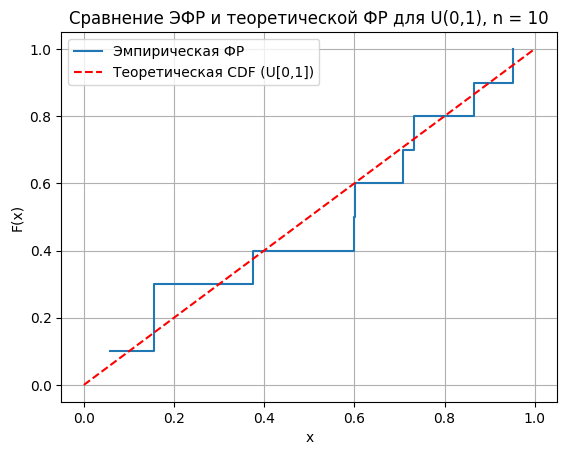

In [15]:
# –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ [0, 1]
n = 10
np.random.seed(42)  # –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
sample = np.random.uniform(0, 1, n)

# 2. –ü–æ—Å—Ç—Ä–æ–∏–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
sample_sorted = np.sort(sample)
# –ó–Ω–∞—á–µ–Ω–∏—è –≠–§–†: –Ω–∞ 1-–π —Ç–æ—á–∫–µ - 1/n, –Ω–∞ 2-–π - 2/n, ..., –Ω–∞ n-–π - n/n
ecdf = np.arange(1, n+1) / n

# 3. –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è CDF –¥–ª—è U(0,1): F(x) = x –¥–ª—è x –æ—Ç 0 –¥–æ 1
x_theor = np.linspace(0, 1, 100)
cdf_theor = x_theor

# 4. –ì—Ä–∞—Ñ–∏–∫
plt.step(sample_sorted, ecdf, where='post', label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –§–†')
plt.plot(x_theor, cdf_theor, 'r--', label='–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è CDF (U[0,1])')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.05, 1.05)
plt.title(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≠–§–† –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–π –§–† –¥–ª—è U(0,1), n = {n}')
plt.legend()
plt.grid(True)
plt.show()

## 3.4 –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ 

–ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ ‚Äî —ç—Ç–æ –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ç–æ–≥–æ, —á—Ç–æ –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è –≤—ã–±–æ—Ä–∫–∞ –º–æ–≥–ª–∞ –ø—Ä–æ–∏–∑–æ–π—Ç–∏ –∏–∑ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ (–∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–ì–∏–ø–æ—Ç–µ–∑—ã:
   - $H_0$: –í—ã–±–æ—Ä–∫–∞ –ø–æ–ª—É—á–µ–Ω–∞ –∏–∑ $F(x)$.
   - $H_1$: –í—ã–±–æ—Ä–∫–∞ –ø–æ–ª—É—á–µ–Ω–∞ –Ω–µ –∏–∑ $F(x)$.

1. –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–≠–§–†):  
   –î–ª—è –≤–∞—à–µ–π –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ $n$ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F_n(x)$ 

2. –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:  
   –ü—É—Å—Ç—å —ç—Ç–æ $F(x)$ ‚Äî CDF –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Å –∫–æ—Ç–æ—Ä—ã–º –≤—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç–µ.

3. –í—ã—á–∏—Å–ª—è–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞:  
   –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è ‚Äî –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ –º–µ–∂–¥—É –≠–§–† –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–π –§–†:
   $
   D_n = \sup_x |F_n(x) - F(x)|
   $
   (sup ‚Äî –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º x). –≠—Ç–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–∞—è "—â–µ–ª—å" –º–µ–∂–¥—É —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.


### –ö–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —ç—Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $D_n$?

- –ü—Ä–∏ –≤–µ—Ä–Ω–æ–π –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ (—Ç–æ –µ—Å—Ç—å –µ—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ $F(x)$), —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $D_n$ (–Ω–∞–∑—ã–≤–∞–µ–º–æ–µ _—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞_) *–Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–∞–º–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F(x)$*, –µ—Å–ª–∏ –æ–Ω–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ.
- –í –ø—Ä–µ–¥–µ–ª–µ (–ø—Ä–∏ $n \to \infty$) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\sqrt{n} D_n$ —Å—Ö–æ–¥–∏—Ç—Å—è –∫ —Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º–æ–º—É _—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞_, —á—å—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
  
  $
  P(\sqrt{n} D_n \leq \lambda ) = 1 - 2\sum_{k=1}^{\infty} (-1)^{k-1} e^{-2k^2 \lambda^2}
  $
  
  –≠—Ç–æ –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –Ω–µ —è–≤–ª—è—é—â–µ–µ—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º –∏–ª–∏ –∫–∞–∫–∏–º-–ª–∏–±–æ "–∏–∑–≤–µ—Å—Ç–Ω—ã–º" –≤ —è–≤–Ω–æ–º –≤–∏–¥–µ, –Ω–æ –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–∞–≤–Ω–æ —Ç–∞–±—É–ª–∏—Ä–æ–≤–∞–Ω—ã (–µ—Å—Ç—å —Ç–∞–±–ª–∏—Ü—ã, –∞–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–æ –≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫–∞—Ö).

- –î–ª—è –º–∞–ª—ã—Ö $n$ –∑–Ω–∞—á–µ–Ω–∏—è $D_n$ —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è—é—Ç—Å—è —Å —Ç–∞–±–ª–∏—á–Ω—ã–º–∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ –∏–ª–∏ –Ω–∞–ø—Ä—è–º—É—é –ø–æ–¥—Å—á–∏—Ç–∞–Ω–Ω—ã–º–∏.

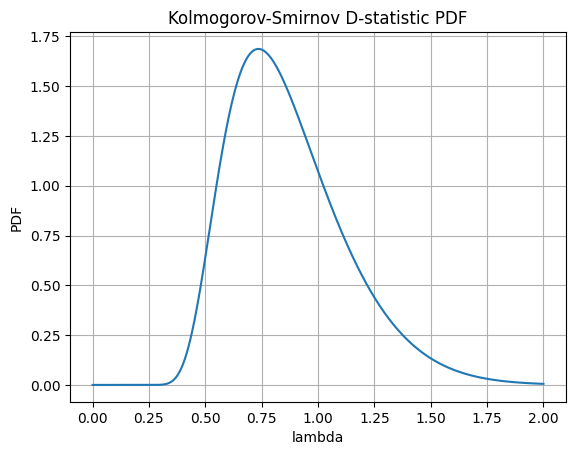

In [17]:
def ks_pdf(lam, kmax=1000):
    res = np.zeros_like(lam)
    for k in range(1, kmax+1):
        res += 8*lam*(-1)**(k-1) * k**2 * np.exp(-2 * k**2 * lam**2)
    return res

lam = np.linspace(0, 2, 500)
pdf = ks_pdf(lam, kmax=1000)

plt.plot(lam, pdf)
plt.title('Kolmogorov-Smirnov D-statistic PDF')
plt.xlabel('lambda')
plt.ylabel('PDF')
plt.grid()
plt.show()

In [18]:

# 1. –í–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞
sample = np.random.uniform(0, 1, 50)

# 2. –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤-–°–º–∏—Ä–Ω–æ–≤ —Ç–µ—Å—Ç –ø—Ä–æ—Ç–∏–≤ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ –Ω–∞ [0,1]
# 'cdf' - cumulative distribution function. –î–ª—è U(0, 1) —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ 'uniform'
ks_statistic, p_value = stats.kstest(sample, 'uniform', args=(0, 1))

print(f"KS-statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
alpha = 0.05
if p_value < alpha:
    print("–ì–∏–ø–æ—Ç–µ–∑–∞ H0 –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: –≤—ã–±–æ—Ä–∫–∞ –ù–ï –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ U(0,1)")
else:
    print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)")

KS-statistic: 0.1347
P-value: 0.2974
–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)


## 3.5 –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ê–ê —Ç–µ—Å—Ç 

–°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ê–ê-—Ç–µ—Å—Ç ‚Äî —ç—Ç–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —Ç–∏–ø —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π —Å–∏–º—É–ª–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞. –ê –ø–æ—Ç–æ–º –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –æ—Ç–≤–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. 

–ú–´ –ó–ù–ê–ï–ú, —á—Ç–æ –≤ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–º –ê–ê-—Ç–µ—Å—Ç–µ **–Ω–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∞**. 

–ü–ª–∞–Ω
- –≤—ã–±—Ä–∞—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫—É—é –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã—Ö 
- –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω—É–∂–Ω—ã–π –Ω–∞–º –æ–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è (–±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞)
- –ü—Ä–æ–≥–Ω–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π
- –ü–æ–≤—Ç–æ—Ä–∏—Ç—å 10000 —Ä–∞–∑

## 3.6 –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ê–ê —Ç–µ—Å—Ç - —Å–µ—Ä–∏—è –∏—Å–ø—ã—Ç–∞–Ω–∏–π –ë–µ—Ä–Ω—É–ª–ª–∏

### –ü–æ—á–µ–º—É –∫–∞–∂–¥—ã–π —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ê–ê —Ç–µ—Å—Ç ‚Äî –∏—Å–ø—ã—Ç–∞–Ω–∏–µ –ë–µ—Ä–Ω—É–ª–ª–∏?

–í –∫–∞–∂–¥–æ–º –æ—Ç–¥–µ–ª—å–Ω–æ –≤–∑—è—Ç–æ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–º –ê–ê-—Ç–µ—Å—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç: 
- –ª–∏–±–æ –æ—Ç–∫–ª–æ–Ω—è–µ–º $H_0$ - –æ—à–∏–±–∫–∞ I —Ä–æ–¥–∞, "–∞–Ω—Ç–∏-—É—Å–ø–µ—Ö" –¥–ª—è –ë–µ—Ä–Ω—É–ª–ª–∏
- –ª–∏–±–æ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ–º $H_0$ ‚Äî "–∞–Ω—Ç–∏-–Ω–µ—É—Å–ø–µ—Ö" –¥–ª—è –ë–µ—Ä–Ω—É–ª–ª–∏.


–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–µ—Ä–∏—é –∏–∑ $n$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –∏—Å–ø—ã—Ç–∞–Ω–∏–π –ë–µ—Ä–Ω—É–ª–ª–∏ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É—Å–ø–µ—Ö–∞ $p$ –≤ –∫–∞–∂–¥–æ–º.

–ù–∞–ø—Ä–∏–º–µ—Ä, –∑–∞–ø—É—Å–∫–∞–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ê–ê —Ç–µ—Å—Ç $n$ —Ä–∞–∑
- —á—Ç–æ –Ω–∞–º –æ—Ç–≤–µ—á–∞–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π? 
- –∫–∞–∫ –æ—Ü–µ–Ω–∏—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å "—É—Å–ø–µ—Ö–∞" –ø–æ –¥–∞–Ω–Ω—ã–º.

–ü—É—Å—Ç—å $X_1, X_2, ..., X_n$ ‚Äî –∏—Å—Ö–æ–¥—ã –∏—Å–ø—ã—Ç–∞–Ω–∏–π ($X_i = 1$ ‚Äî —É—Å–ø–µ—Ö (–æ—à–∏–±–∫–∞ I —Ä–æ–¥–∞), $X_i = 0$ ‚Äî –Ω–µ—É–¥–∞—á–∞).

–°—Ä–µ–¥–Ω–µ–µ:
$$
\hat p = \bar{X} = \dfrac{1}{n} \sum_{i=1}^n X_i
$$

- $E[\hat{p}] = p$
- $Var(\hat{p}) = \dfrac{p(1-p)}{n}$


–ü–æ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π –ø—Ä–µ–¥–µ–ª—å–Ω–æ–π —Ç–µ–æ—Ä–µ–º–µ, $\hat{p}$ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é:
$$
\hat{p} \approx \mathcal{N} \left(p,\, \dfrac{p(1-p)}{n}\right) \quad\text{–ø—Ä–∏ –±–æ–ª—å—à–∏—Ö}\ n
$$

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –¥–ª—è –æ–¥–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –±—É–¥–µ—Ç: 

$\hat p (1 - \hat p) = \dfrac{1}{n} \sum \limits_i (X_i - \bar X)^2$

$$
\dfrac{\hat{p} - p}{\sqrt{\dfrac{\hat p (1 - \hat p)}{n}}} = \dfrac{\hat{p} - p}{\hat \sigma} \approx \mathcal{N}\left(0,1\right) \quad\text{–ø—Ä–∏ –±–æ–ª—å—à–∏—Ö}\ n
$$

## 3.7 –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª (–∏–ª–∏ Confidence Interval, CI) ‚Äî —ç—Ç–æ –¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–π —Å –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é (—É—Ä–æ–≤–Ω–µ–º –¥–æ–≤–µ—Ä–∏—è) —Å–æ–¥–µ—Ä–∂–∏—Ç –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –≥–µ–Ω–µ—Ä–∞–ª—å–Ω–æ–π —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ä–µ–¥–Ω–µ–µ –∏–ª–∏ –¥–æ–ª—é.

$$z_{\alpha/2}\le \dfrac{\hat{p} - p}{\hat \sigma} \le z_{1-\alpha/2}$$

$$
p \in \hat{p} \pm z_{1 - \alpha/2}\sqrt{\dfrac{\hat{p} (1 - \hat{p})}{n}}
$$

–í–∞–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å: –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –Ω–µ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 95% –ø–∞—Ä–∞–º–µ—Ç—Ä "–Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞". –û–Ω –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ (–ø—Ä–∏ –º–Ω–æ–≥–æ–∫—Ä–∞—Ç–Ω–æ–º –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–∏) –¥–∞—ë—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ 95% —Å–ª—É—á–∞–µ–≤.


## 3.8 –î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤–∞–ª–∏–¥–Ω–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è

- –ø—Ä–æ–≤–µ—Å—Ç–∏ –º–Ω–æ–≥–æ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –ê–ê —Ç–µ—Å—Ç–æ–≤
- pvalue –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, —ç—Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤–∏–∑—É–∞–ª—å–Ω–æ —Å –ø–æ–º–æ—â—å—é –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã (—ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å), QQ-plot, –≠–§–†, –ö—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞
- –º—ã –º–æ–∂–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–æ–≥–ª–∞—Å–Ω–æ –∑–∞–¥–∞–Ω–Ω–æ–º—É —É—Ä–æ–≤–Ω—é –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 

## 4.1 –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–π –ø—Ä–∏–º–µ—Ä. –ê–≥—Ä–µ–≥–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö 

### –°—ã—Ä—ã–µ –ª–æ–≥–∏ –∏ –µ–¥–∏–Ω–∏—Ü–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è

<img src="pictures/raw_logs.png" width="400">



1. –ù–∞–±–ª—é–¥–µ–Ω–∏–µ = —Å–æ–±—ã—Ç–∏–µ (<span style="color: red;">–ø–ª–æ—Ö–æ:</span>  –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤ –¥–∞–Ω–Ω—ã—Ö)

2. –ù–∞–±–ª—é–¥–µ–Ω–∏—è = –∫–∞–∫-—Ç–æ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–æ–±—ã—Ç–∏—è


> **–ü–æ—é–∑–µ—Ä–Ω–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è** - –∞–≥—Ä–µ–≥–∞—Ü–∏—è (—Ç–∏–ø–∞ —Å—É–º–º–∞) –¥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, —Ç–æ –µ—Å—Ç—å –æ–¥–∏–Ω –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å - –æ–¥–Ω–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ

$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u)$$

<img src="pictures/sum.png" width="300">

$E_t$ - —ç—Ç–æ –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–æ–±—ã—Ç–∏–π –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ.

$U_t$ - —ç—Ç–æ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ.

$X(e), X(u)$ - —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Å–æ–±—ã—Ç–∏—é –∏–ª–∏ –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. 

–û—Ü–µ–Ω–∫–∞ –¥–ª—è value –º–µ—Ç—Ä–∏–∫–∏ –±—É–¥–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ
$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u) \rightarrow \dfrac{\sum\limits_{u \in U_t} X(u)}{n} = \overline X_t$$


üî• –í–æ–ø—Ä–æ—Å –Ω–∞ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–∏. –ü–æ—á–µ–º—É –Ω–µ–ª—å–∑—è –ø—Ä–æ—Å—Ç–æ –≤–∑—è—Ç—å —Å—ã—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∏—Ö –∫–∞–∫ –µ—Å—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –º—ã —Ö–æ—Ç–∏–º —Å—Ä–∞–≤–Ω–∏—Ç—å —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π? 
    
## 4.2 –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å–∏–º—É–ª—è—Ü–∏—è—Ö
    
–ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º $n$ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–∞—Ö. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è $i$ –º—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ç—Ä–∏ —ç—Ç–∞–ø–∞.

–≠—Ç–∞–ø 1: –û–ø—Ä–µ–¥–µ–ª–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—ã—Ç–∏–π $k_i$ —Å –ø–æ–º–æ—â—å—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ü—É–∞—Å—Å–æ–Ω–∞ —Å–æ —Å—Ä–µ–¥–Ω–∏–º 3. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å $k_i = 3$.

–≠—Ç–∞–ø 2: –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤–µ–∫—Ç–æ—Ä –¥–ª–∏–Ω—ã $k_i$ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∏–∑ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í —ç—Ç–æ–º –ø—Ä–∏–º–µ—Ä–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ 400, –ø–æ—ç—Ç–æ–º—É –≤–µ–∫—Ç–æ—Ä –±—É–¥–µ—Ç (400, 400, 400).

–≠—Ç–∞–ø 3: –ü—Ä–∏–º–µ–Ω–∏–º –∫ –∫–∞–∂–¥–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –≤–µ–∫—Ç–æ—Ä–∞ —Å–ª—É—á–∞–π–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —à—É–º–∞, –≤—ã–±–∏—Ä–∞—è –µ–≥–æ –∏–∑ —Å–ø–∏—Å–∫–∞ [0.8, 0.9, 1, 1.1, 1.2]. –í –¥–∞–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —à—É–º–∞ ‚Äî 1.1, 0.8 –∏ 0.9. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –∏—Ç–æ–≥–æ–≤—ã–π –≤–µ–∫—Ç–æ—Ä –±—É–¥–µ—Ç (440, 320, 360).    

In [19]:
def group_sample_gen(mu_exp=500, mu_pois=3, n=1000):
    noise_factors = [0.8, 0.9, 1, 1.1, 1.2]
    test_event = []
    control_event = []
    test_user = []
    control_user = []
    for i in range(n):
        k_test = np.random.poisson(lam=mu_pois)
        noise_test = [random.choice(noise_factors) for _ in range(k_test)]
        test_temp = [np.random.exponential(mu_exp)] * k_test
        test_event = test_event + [a * b for a, b in zip(noise_test, test_temp)]
        test_user = test_user + [sum([a * b for a, b in zip(noise_test, test_temp)])]
        k_control = np.random.poisson(lam=mu_pois)
        noise_control = [random.choice(noise_factors) for _ in range(k_control)]
        control_temp = [np.random.exponential(mu_exp)] * k_control
        control_event = control_event + [a * b for a, b in zip(noise_control, control_temp)]
        control_user = control_user + [sum([a * b for a, b in zip(noise_control, control_temp)])]
    return test_event, control_event, test_user, control_user 

In [21]:
#–í—ã—á–∏—Å–ª–∏—Ç—å p-value 1 000 —Ä–∞–∑ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ (p_value_event) –∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö —Å –∞–≥—Ä–µ–≥–∞—Ü–∏–µ–π –ø–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º (p_value_user).

pvalue_tt_event = []
pvalue_tt_user = []
for i in tqdm(range(1000)):
    test_event, control_event, test_user, control_user  = group_sample_gen()
    _, p_value_event = stats.ttest_ind(test_event, control_event, equal_var=False)
    _, p_value_user = stats.ttest_ind(test_user, control_user, equal_var=False)
    pvalue_tt_event.append(p_value_event)
    pvalue_tt_user.append(p_value_user)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:30<00:00, 33.20it/s]


## 4.3 –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è $\alpha$ –∏ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å p-value

$$z_{\alpha/2}\le \dfrac{\hat{p} - p}{\hat \sigma} \le z_{1-\alpha/2}$$

$$
\hat{p} - z_{1 - \alpha/2}\cdot \hat \sigma \le p \le \hat{p} + z_{1 - \alpha/2}\cdot \hat \sigma
$$

In [22]:
#–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –≤—ã—á–∏—Å–ª—è–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –¥–æ–ª–∏ —É—Å–ø–µ—Ö–æ–≤ –≤ —Å–µ—Ä–∏–∏ –∏—Å–ø—ã—Ç–∞–Ω–∏–π –ë–µ—Ä–Ω—É–ª–ª–∏.

def proportion_ci(pvalue_vector, alpha=0.05):
    pvalue_vector = np.asarray(pvalue_vector).flatten()
    n = len(pvalue_vector)
    count = np.sum(pvalue_vector < alpha)
    p = count / n
    left_bound = p - np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    right_bound = p + np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    return p, left_bound, right_bound

In [23]:
def plot_comparison_with_uniform(p_value_vector, title, color='skyblue'):
    # –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è proportion_ci –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –æ—Ç–¥–µ–ª—å–Ω–æ
    p, left_boundary, right_boundary = proportion_ci(p_value_vector)
    print(f"–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: {round(p, 4)},\nCI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [{round(left_boundary, 4)}, {round(right_boundary, 4)}]")

    fig1, ax1 = plt.subplots(1, 3, figsize=(17, 5))
    
    # --- 1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ P-value ---
    ax1[0].hist(p_value_vector, bins=30, edgecolor='black', alpha=0.7, color=color)
    ax1[0].set_title(
        f'–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: {round(np.sum(np.array(p_value_vector) < 0.05) / len(p_value_vector), 3)}'
    )
    ax1[0].set_xlabel('P-value')
    ax1[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    
    # --- 2. QQ-–≥—Ä–∞—Ñ–∏–∫ ---
    stats.probplot(p_value_vector, dist=stats.uniform, plot=ax1[1])
    ax1[1].get_lines()[1].set_linestyle('--')
    ax1[1].set_title(f'{title} (QQ-–≥—Ä–∞—Ñ–∏–∫)')
    
    # --- 3. –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ---
    pvals_sorted = np.sort(p_value_vector)
    n = len(pvals_sorted)
    ecdf = np.arange(1, n+1) / n

    x_uniform = np.linspace(0, 1, 200)
    cdf_uniform = x_uniform

    ax1[2].step(pvals_sorted, ecdf, where='post', label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –§–†', color=color)
    ax1[2].plot(x_uniform, cdf_uniform, 'k--', label='–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è CDF $U[0,1]$')
    
    # --- –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ ---
    ks_statistic, ks_p_value = stats.kstest(p_value_vector, 'uniform', args=(0, 1))
    print(f'–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: {round(ks_statistic, 4)}, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: {round(ks_p_value, 4)}')
    if ks_p_value < 0.05:
        print("–ì–∏–ø–æ—Ç–µ–∑–∞ H0 –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: –≤—ã–±–æ—Ä–∫–∞ –ù–ï –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ U(0,1)")
    else:
        print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)")
    
    ax1[2].set_title('–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è –§–†')
    ax1[2].set_xlabel('p-value')
    ax1[2].set_ylabel('F(p-value)')
    ax1[2].legend(loc="lower right")
    ax1[2].text(
        0.05, 0.9,
        f"KS: stat={ks_statistic:.3f}\np={ks_p_value:.3f}",
        transform=ax1[2].transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="w", alpha=0.5)
    )

    plt.tight_layout()
    plt.show()

–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.296,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.2677, 0.3243]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.3094, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.0
–ì–∏–ø–æ—Ç–µ–∑–∞ H0 –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: –≤—ã–±–æ—Ä–∫–∞ –ù–ï –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ U(0,1)


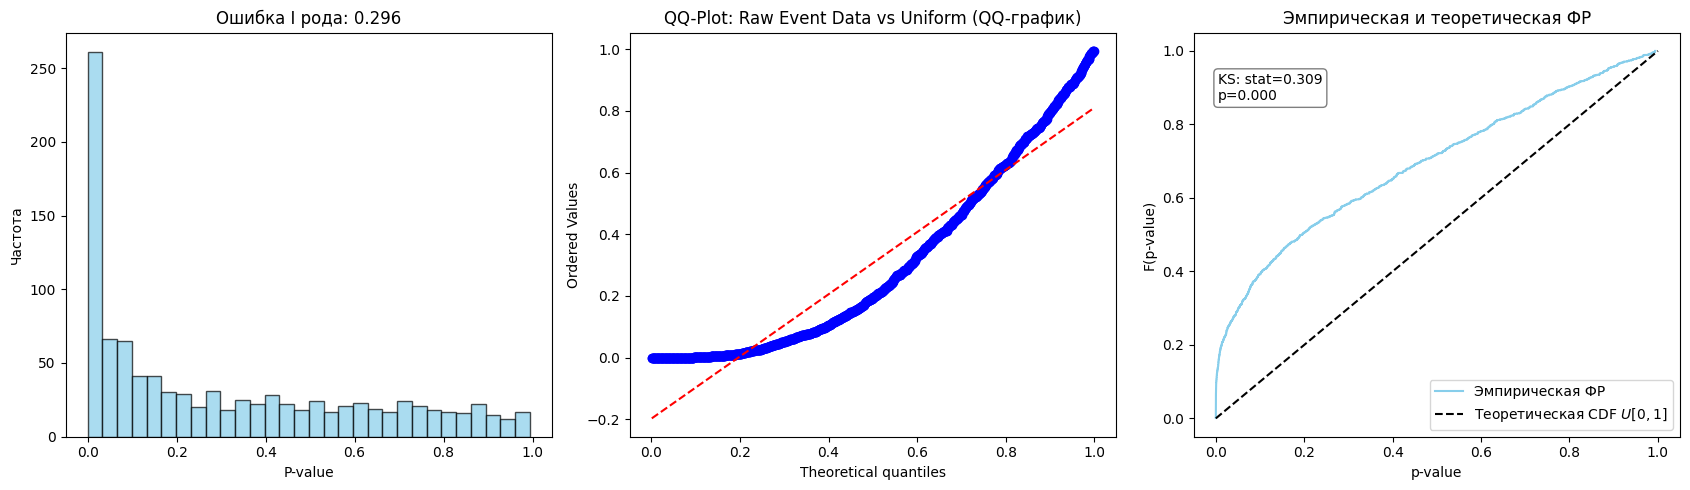

In [24]:
p_value_vector = pvalue_tt_event
plot_comparison_with_uniform(p_value_vector, 'QQ-Plot: Raw Event Data vs Uniform')

–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.049,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.0356, 0.0624]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.0278, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.4132
–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)


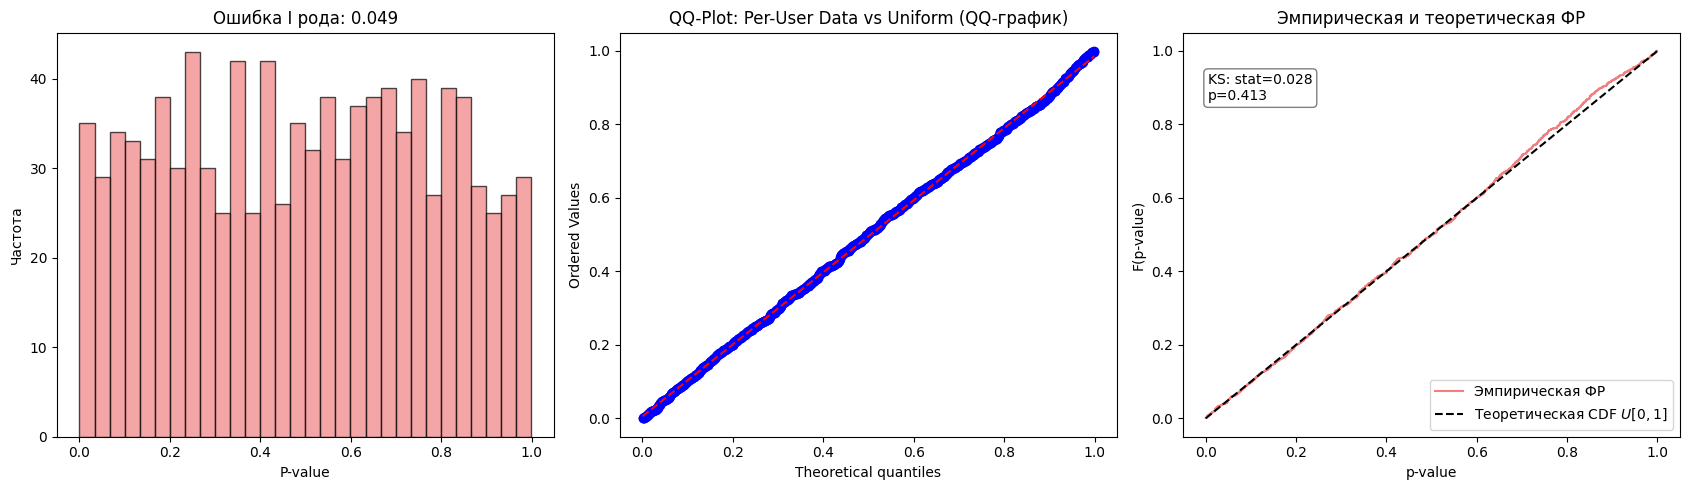

In [25]:
p_value_vector = pvalue_tt_user
plot_comparison_with_uniform(p_value_vector, 'QQ-Plot: Per-User Data vs Uniform', 'lightcoral')

## 4.4 –û–±–æ–±—â–µ–Ω–∏–µ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞

–°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –ê–ê-—Ç–µ—Å—Ç—ã - –æ—Ç–∫—É–¥–∞ –±—Ä–∞—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è —Å–∏–º—É–ª—è—Ü–∏–∏? 

–ê –µ—Å–ª–∏ –Ω–∞–º –Ω–µ –∏–∑–≤–µ—Å—Ç–Ω—ã –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è? 

### –î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –æ—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ —Ç–æ–π –∂–µ –≤—ã–±–æ—Ä–∫–µ

In [26]:
pvalue_vector = []
for i in tqdm(range(1000)):
    sample = stats.norm(loc=0, scale=1).rvs(1000)
    mu = np.mean(sample)
    sigma = np.std(sample, ddof=1)
    ks_statistic, p_value = stats.kstest(sample, 'norm', args=(mu, sigma))
    pvalue_vector.append(p_value)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 629.61it/s]


–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.0,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.0, 0.0]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.4203, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.0
–ì–∏–ø–æ—Ç–µ–∑–∞ H0 –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: –≤—ã–±–æ—Ä–∫–∞ –ù–ï –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ U(0,1)


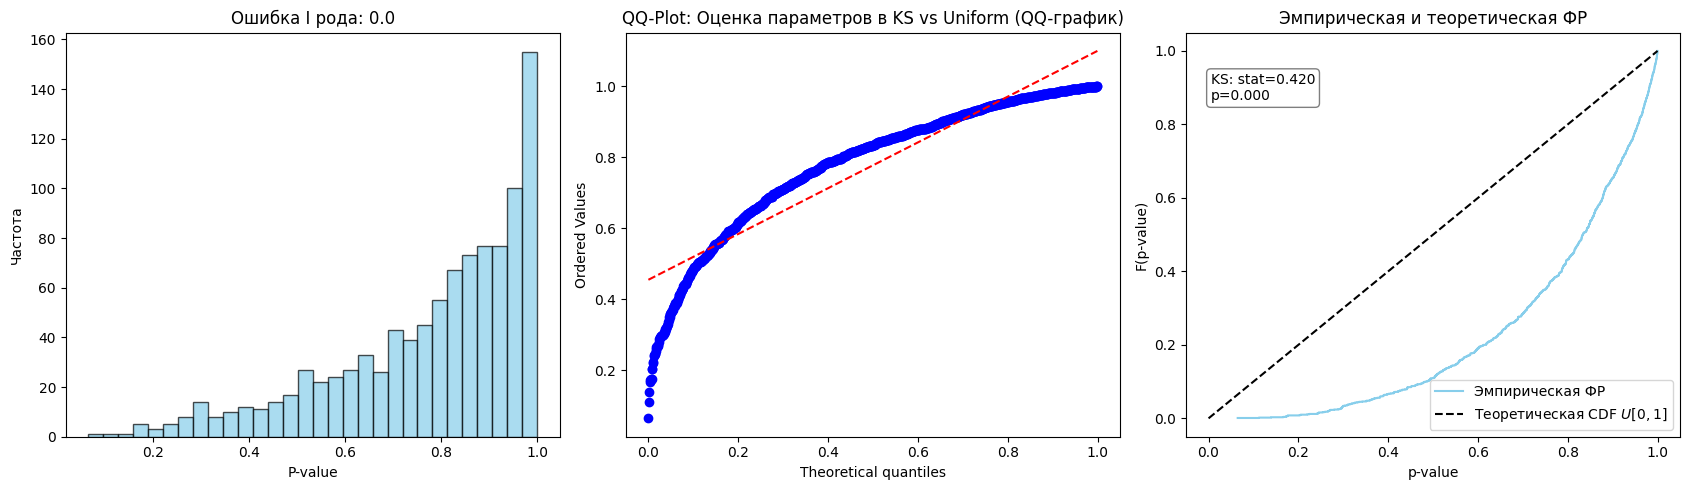

In [27]:
plot_comparison_with_uniform(pvalue_vector, 'QQ-Plot: –û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ KS vs Uniform')

### –î–∞–≤–∞–π—Ç–µ –æ—Ü–µ–Ω–∏–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ D –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ 

In [28]:
data = stats.norm(loc=0, scale=1).rvs(1000)
# 1. –û—Ü–µ–Ω–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
mu, sigma = np.mean(data), np.std(data, ddof=1)

# 2. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ K-S –¥–ª—è –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö
statistic, _ = stats.kstest(data, 'norm', args=(mu, sigma))

emp_stats = []
for i in range(500):
    sample = stats.norm(loc=0, scale=1).rvs(1000)
    mu_sample, sigma_sample = np.mean(sample), np.std(sample, ddof=1)
    ks_stat, _ = stats.kstest(sample, 'norm', args=(mu_sample, sigma_sample))
    emp_stats.append(ks_stat)

# 3. –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ p-value
emp_p_value = np.mean(np.array(emp_stats) >= statistic)
print("K-S statistic:", statistic)
print("C–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ p-value:", emp_p_value)

K-S statistic: 0.017784789895289532
C–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ p-value: 0.628


In [29]:
pvalue_vector_—Åorrected = []
for i in tqdm(range(500)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    statistic, _ = stats.kstest(data, 'norm', args=(mu, sigma))
    emp_stats = []
    for i in range(1000):
        sample = stats.norm(loc=mu, scale=sigma).rvs(1000)
        mu_sample, sigma_sample = np.mean(sample), np.std(sample, ddof=1)
        ks_stat, _ = stats.kstest(sample, 'norm', args=(mu_sample, sigma_sample))
        emp_stats.append(ks_stat)
    emp_p_value = np.mean(np.array(emp_stats) >= statistic)
    pvalue_vector_—Åorrected.append(emp_p_value)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [12:53<00:00,  1.55s/it]


–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.04,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.0228, 0.0572]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.036, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.5242
–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)


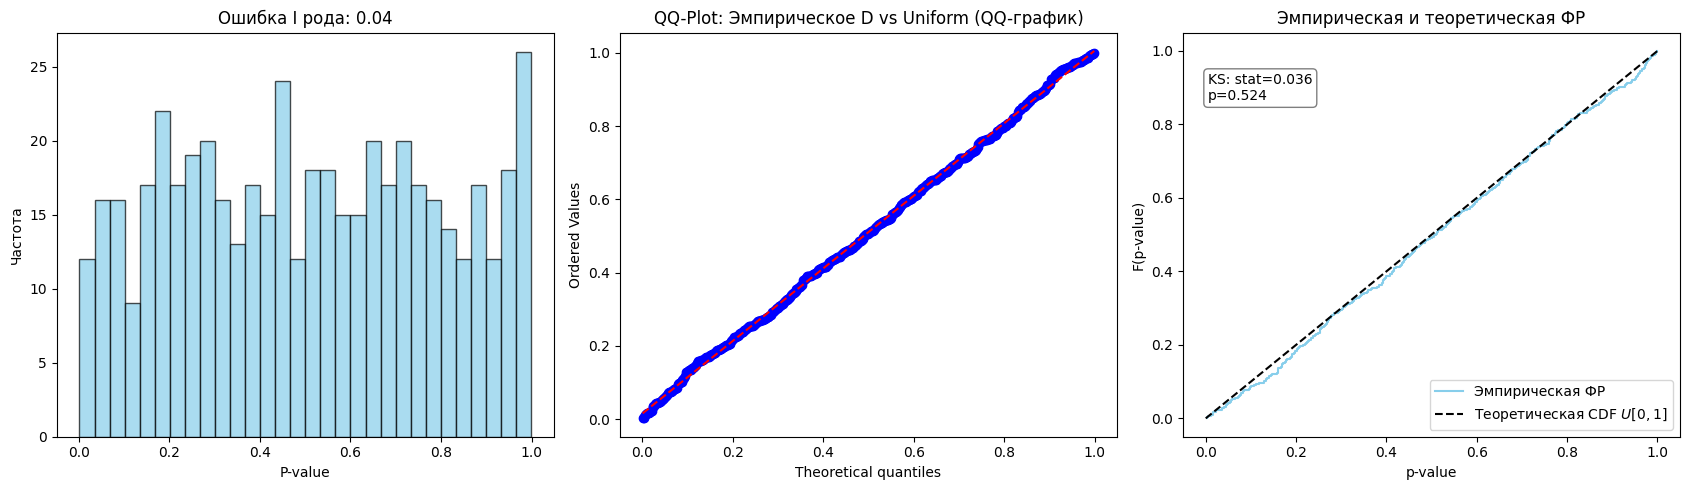

In [30]:
plot_comparison_with_uniform(pvalue_vector_—Åorrected, 'QQ-Plot: –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ D vs Uniform')

### –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞
- –ì–æ–¥–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
- –ï—Å–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã, —Ç–æ –Ω–µ–ª—å–∑—è –Ω–∞–ø—Ä—è–º—É—é –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ—Ü–µ–Ω–∫–∏ 
- –î–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞–¥–æ —Å—Ç—Ä–æ–∏—Ç—å —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –∏ pvalue –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –ø–æ –Ω–µ–π

–î–ª—è –∫–ª–∞—Å—Å–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π —Å—É—â–µ—Å—Ç–≤—É—é—Ç 
- **–õ–∏–ª–ª–∏—Ñ–æ—Ä—Å-—Ç–µ—Å—Ç** 
- –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ‚Äì–£–∏–ª–∫–∞ (**Shapiro‚ÄìWilk test**) 

### –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –∏–¥–µ—è –õ–∏–ª–ª–∏—Ñ–æ—Ä—Å-—Ç–µ—Å—Ç

–ú–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ KS:
- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ D —Ç–µ–ø–µ—Ä—å –¥—Ä—É–≥–æ–µ: –æ–Ω–æ —É—á–∏—Ç—ã–≤–∞–µ—Ç –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è $\hat{\mu}$ –∏ $\hat{\sigma}$ (–ø–æ–ø—Ä–∞–≤–∫–∏ –≤—Å—Ç—Ä–æ–µ–Ω—ã –≤ –ø–∞–∫–µ—Ç).

In [31]:
import numpy as np
from statsmodels.stats.diagnostic import lilliefors

data = stats.norm(loc=0, scale=1).rvs(1000)
stat, p = lilliefors(data, dist='norm')  # dist=‚Äônorm‚Äô –∏–ª–∏ ‚Äòexp‚Äô
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –õ–∏–ª–ª–∏—Ñ–æ—Ä—Å–∞:", stat)
print("p-value (—É–∂–µ —Å —É—á–µ—Ç–æ–º, —á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã!):", p)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –õ–∏–ª–ª–∏—Ñ–æ—Ä—Å–∞: 0.012790213823153929
p-value (—É–∂–µ —Å —É—á–µ—Ç–æ–º, —á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã!): 0.975926191101352


In [32]:
pvalue_vector_lilliefors = []
for i in tqdm(range(1000)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    lil_stat, lil_p_value = lilliefors(data, dist='norm')
    pvalue_vector_lilliefors.append(lil_p_value)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 640.08it/s]


–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.039,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.027, 0.051]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.0845, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.0
–ì–∏–ø–æ—Ç–µ–∑–∞ H0 –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: –≤—ã–±–æ—Ä–∫–∞ –ù–ï –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ U(0,1)


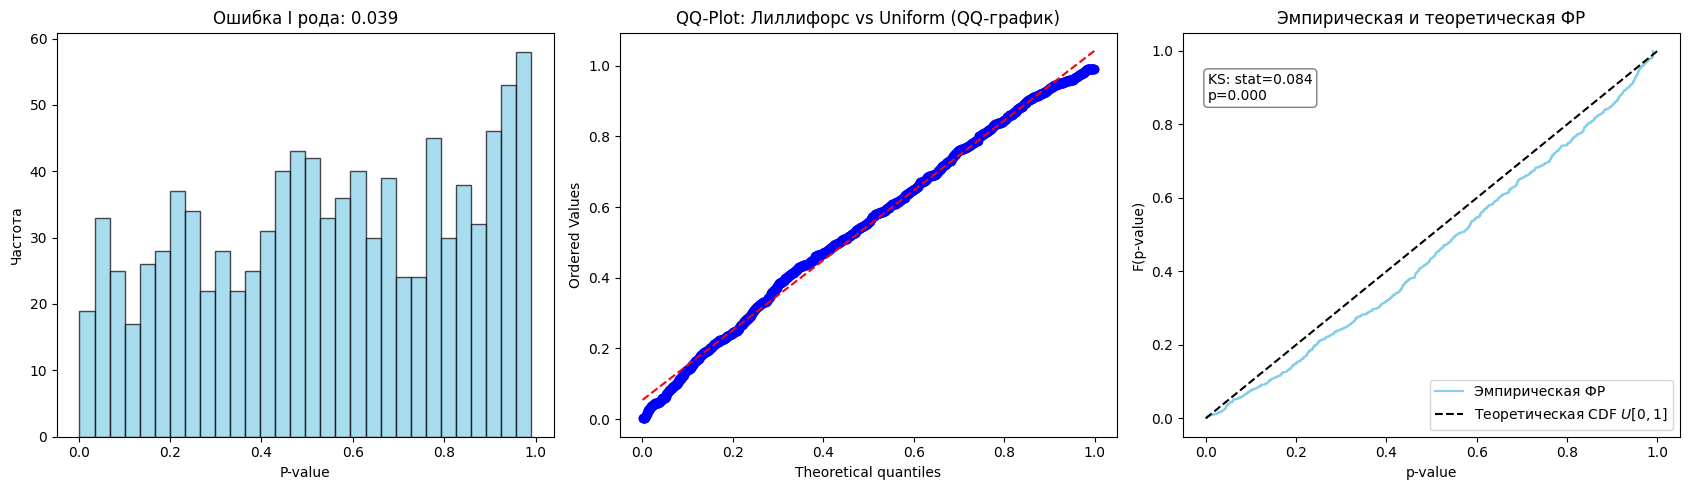

In [33]:
plot_comparison_with_uniform(pvalue_vector_lilliefors, 'QQ-Plot: –õ–∏–ª–ª–∏—Ñ–æ—Ä—Å vs Uniform')

### –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –∏–¥–µ—è –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

–ü—É—Å—Ç—å –≤–∞—à–∏ –¥–∞–Ω–Ω—ã–µ:  
$$
X_1 \leq X_2 \leq ... \leq X_n
$$


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ W —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫
$$
W = \dfrac{\left(\sum\limits_{i=1}^n a_i X_{(i)}\right)^2}{\sum\limits_{i=1}^n (X_i - \bar{X})^2}
$$
–≥–¥–µ $a_i$ ‚Äî —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞, –≤—ã—á–∏—Å–ª—è–µ–º—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫.

–ò–Ω—Ç—É–∏—Ü–∏—è:
- –ï—Å–ª–∏ –≤–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∏–¥–µ–∞–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã, —á–∏—Å–ª–∏—Ç–µ–ª—å –ø–æ—á—Ç–∏ —Ä–∞–≤–µ–Ω –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—é.
- –ï—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–∫–æ—Å (–≥—Ä—É–±–æ–µ –æ—Ç–ª–∏—á–∏–µ, —Ç—è–∂–µ–ª—ã–µ —Ö–≤–æ—Å—Ç—ã, –≤—ã—Å–æ–∫–∞—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è, –≤—ã–±—Ä–æ—Å—ã), —á–∏—Å–ª–∏—Ç–µ–ª—å –±—É–¥–µ—Ç –∑–∞–º–µ—Ç–Ω–æ –º–µ–Ω—å—à–µ –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—è.
- –°–∞–º–æ W ‚âà 1 –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ 0 –ø—Ä–∏ —Å–∏–ª—å–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è—Ö.

> –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ‚Äì–£–∏–ª–∫–∞ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –≤–∞—à—É —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É —Å —Ç–µ–º, –∫–∞–∫ –≤—ã–≥–ª—è–¥–µ–ª–∞ –±—ã —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ —Ç–∞–∫–æ–≥–æ –∂–µ —Ä–∞–∑–º–µ—Ä–∞ –∏–∑ –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ß–µ–º —Å–∏–ª—å–Ω–µ–µ –æ—Ç–ª–∏—á–∏–µ ‚Äî —Ç–µ–º –º–µ–Ω—å—à–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ W –∏ –Ω–∏–∂–µ p-value.

In [34]:
from scipy.stats import shapiro
import numpy as np

data = stats.norm(loc=0, scale=1).rvs(1000)

# –ó–∞–ø—É—Å–∫ —Ç–µ—Å—Ç–∞
stat, p = shapiro(data)

print('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ W:', stat)
print('p-value:', p)
if p > 0.05:
    print("–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H‚ÇÄ: –¥–∞–Ω–Ω—ã–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ")
else:
    print("–û—Ç–∫–ª–æ–Ω—è–µ–º H‚ÇÄ: –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ W: 0.9982016086578369
p-value: 0.3775637149810791
–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H‚ÇÄ: –¥–∞–Ω–Ω—ã–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ


In [35]:
pvalue_vector_shapiro = []
for i in tqdm(range(1000)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    shapiro_stat, shapiro_p_value = shapiro(data)
    pvalue_vector_shapiro.append(shapiro_p_value)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1218.99it/s]


–û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: 0.043,
CI –¥–ª—è o—à–∏–±–∫–∏ I —Ä–æ–¥–∞: [0.0304, 0.0556]
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: 0.0366, pvalue –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≠–§–† —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º: 0.1348
–ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å H0: –≤—ã–±–æ—Ä–∫–∞ –ú–û–ì–õ–ê –±—ã—Ç—å –∏–∑ U(0,1)


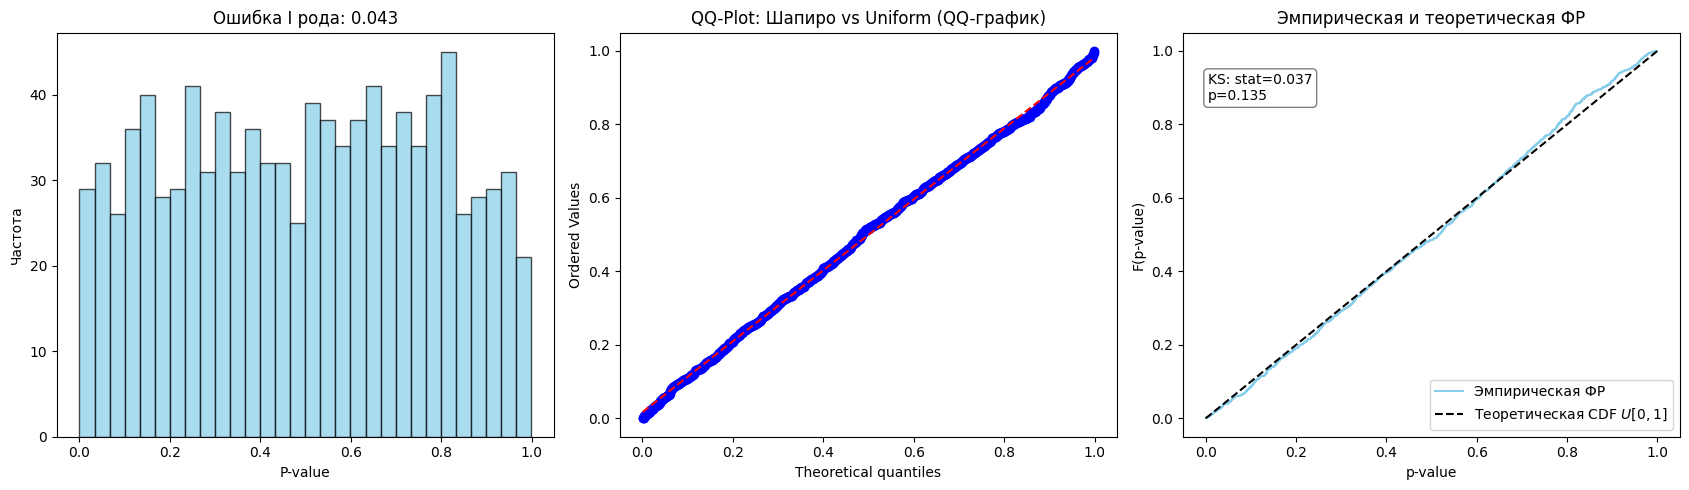

In [36]:
plot_comparison_with_uniform(pvalue_vector_shapiro, 'QQ-Plot: –®–∞–ø–∏—Ä–æ vs Uniform')

## 4.5 –ê —á—Ç–æ –µ—Å–ª–∏ –º—ã –Ω–µ –∑–Ω–∞–µ–º –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã—Ö?

–ê–ê —Ç–µ—Å—Ç—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö:
- –†–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–µ–ø–µ—Ä–µ—Å–µ–∫–∞—é—â–∏–µ—Å—è —Å–µ–≥–º–µ–Ω—Ç—ã, –ø–æ—Ç–æ–º –∫–∞–∂–¥—ã–π —Å–µ–≥–º–µ–Ω—Ç –¥–∞–Ω–Ω—ã—Ö —Ä–∞–∑–±–∏—Ç—å –Ω–∞ —Ç–µ—Å—Ç –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å 
- –†–∞–∑–±–∏—Ç—å –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –¥–∞–Ω–Ω—ã–µ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –º–Ω–æ–≥–æ —Ä–∞–∑ –Ω–∞ —Ç–µ—Å—Ç –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å

–¢–∞–±–ª–∏—Ü–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è

| –ö—Ä–∏—Ç–µ—Ä–∏–π                   | –ù–µ–ø–µ—Ä–µ—Å–µ–∫–∞—é—â–∏–µ—Å—è —Å–µ–≥–º–µ–Ω—Ç—ã  | –ú–Ω–æ–≥–æ —Ä–∞–Ω–¥–æ–º–Ω—ã—Ö —Ä–∞–∑–±–∏–µ–Ω–∏–π      |
|----------------------------|----------------------------|--------------------------------|
| –ù–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤| +                          | ‚Äî                              |
| –ß–∏—Å–ª–æ –ø—Ä–æ–≤–µ—Ä–æ–∫             | –ú–∞–ª–æ (–∫–æ–ª-–≤–æ —Å–µ–≥–º–µ–Ω—Ç–æ–≤)    | –ú–Ω–æ–≥–æ (–¥–µ—Å—è—Ç–∫–∏, —Å–æ—Ç–Ω–∏ —Ç—ã—Å—è—á)   |
| –ò–º–∏—Ç–∏—Ä—É–µ—Ç "—Ä–µ–∞–ª—å–Ω—ã–π" A/B | +                          | ‚Äî                              |
| –û—Ü–µ–Ω–∫–∞ –±–æ–µ–≤–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏    | +                          | ‚Äî                              |